In [ ]:
#=============================================
#                                           Nadam
#-------------------------------------------------------------------------------
# An algorithm that incorporates Nesterov's acceleration 
# method into Adam.
#=============================================

In [1]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(2020)
tf.random.set_seed(2020)

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

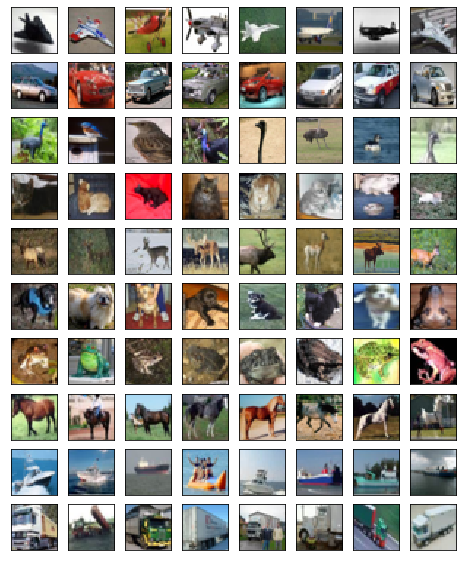

In [3]:
# View 8 samples for each of the 10 categories
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            c += 1
            subplot = fig.add_subplot(10, 8, c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(train_images[j])
            if c % 8 == 0:
                break

In [4]:
# Object for image data enhancement
datagen = ImageDataGenerator(rotation_range = 10,
                                                        width_shift_range = 0.1,
                                                        height_shift_range = 0.1,
                                                        zoom_range = [0.8, 1.2],
                                                        horizontal_flip = True,
                                                        channel_shift_range = 0.2)

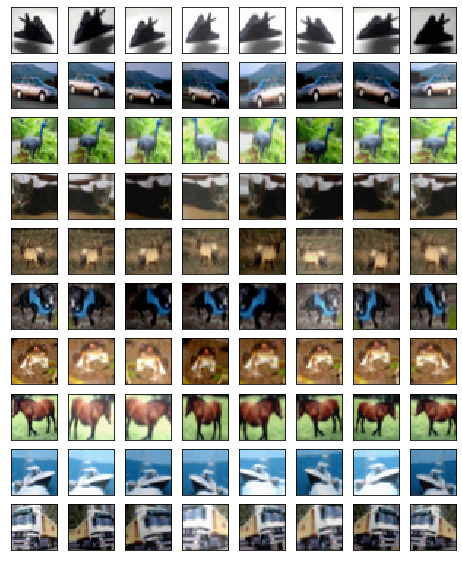

In [5]:
# View randomly modified images from each category
fig = plt.figure(figsize=(8, 10))
c = 0
for i in range(10):
    for j in range(len(train_images)):
        if np.argmax(train_labels[j]) == i:
            break
    c += 1
    subplot = fig.add_subplot(10, 8, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(train_images[j])
    
    for _ in range(7):
        img = datagen.flow(np.array([train_images[j]]), batch_size=1)[0][0]
        c += 1
        subplot = fig.add_subplot(10, 8, c)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(img)

In [6]:
model = models.Sequential()

# ===================================================

model.add(layers.Conv2D(32, (3, 3), 
                                               padding='same',
                                               kernel_initializer=initializers.TruncatedNormal(),
                                               use_bias=True,
                                               activation='relu',
                                               input_shape=(32, 32, 3),
                                               name='conv_filter1-1'
                                               ))
#-------------------------------------------------------------------------------------------
model.add(layers.Conv2D(32, (3, 3), 
                                               padding='same',
                                               kernel_initializer=initializers.TruncatedNormal(),
                                               use_bias=True,
                                               activation='relu',
                                               name='conv_filter1-2'
                                               ))
#-------------------------------------------------------------------------------------------
model.add(layers.MaxPooling2D((2, 2),
                                                         name='max_pooling1'
                                                         ))
#-------------------------------------------------------------------------------------------
model.add(layers.Dropout(rate=0.25, 
                                               name='dropout1'
                                               ))

# ===================================================

model.add(layers.Conv2D(64, (3, 3), 
                                               padding='same',
                                               kernel_initializer=initializers.TruncatedNormal(),
                                               use_bias=True,
                                               activation='relu',
                                               name='conv_filter2-1'
                                               ))
#-------------------------------------------------------------------------------------------
model.add(layers.Conv2D(64, (3, 3), 
                                               padding='same',
                                               kernel_initializer=initializers.TruncatedNormal(),
                                               use_bias=True,
                                               activation='relu',
                                               name='conv_filter2-2'
                                               ))
#-------------------------------------------------------------------------------------------
model.add(layers.MaxPooling2D((2, 2),
                                                         name='max_pooling2'
                                                         ))
#-------------------------------------------------------------------------------------------
model.add(layers.Dropout(rate=0.25, 
                                               name='dropout2'
                                               ))

# ===================================================

model.add(layers.Flatten(name='flatten'))
#-------------------------------------------------------------------------------------------
model.add(layers.Dense(512,
                                          activation='relu',
                                          kernel_initializer=initializers.TruncatedNormal(),
                                          name='hidden'
                                          ))
#-------------------------------------------------------------------------------------------
model.add(layers.Dropout(rate=0.5,
                                               name='dropout3'
                                               ))
#-------------------------------------------------------------------------------------------
model.add(layers.Dense(10,
                                           activation='softmax',
                                           name='softmax'
                                           ))

# ===================================================

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_filter2-2 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)          0

In [7]:
#=============================================
# Optimization Algorithm : Nadam
#=============================================
# Loss Function : Categorical Cross Entropy 
model.compile(optimizer='nadam',
                           loss='categorical_crossentropy',
                           metrics=['acc'])

In [8]:
batch_size = 64
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=batch_size),
                                                     validation_data=(test_images, test_labels),
                                                     steps_per_epoch=len(train_images) / batch_size,
                                                     epochs=20
                                                     )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 781.25 steps, validate on 10000 samples
Epoch 1/20
782/781 [==============================] - 131s 167ms/step - loss: 1.7794 - acc: 0.3474 - val_loss: 1.3210 - val_acc: 0.5282
Epoch 2/20
782/781 [==============================] - 120s 153ms/step - loss: 1.3813 - acc: 0.5015 - val_loss: 1.1996 - val_acc: 0.5767
Epoch 3/20
782/781 [==============================] - 120s 154ms/step - loss: 1.2080 - acc: 0.5668 - val_loss: 0.9584 - val_acc: 0.6649
Epoch 4/20
782/781 [==============================] - 121s 155ms/step - loss: 1.1180 - acc: 0.6037 - val_loss: 0.9296 - val_acc: 0.6757
Epoch 5/20
782/781 [==============================] - 122s 156ms/step - loss: 1.0467 - acc: 0.6302 - val_loss: 0.9398 - val_acc: 0.6726
Epoch 6/20
782/781 [==============================] - 122s 155ms/step - loss: 0.9998 - acc: 0.6471 - val_loss: 0.8549 - val_acc: 0.6957
Epoch 7/20
782/781 [=============

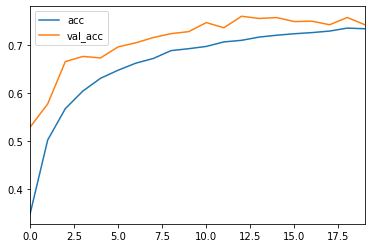

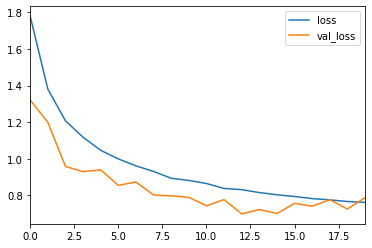

In [9]:
DataFrame({'acc': history.history['acc'],
                      'val_acc': history.history['val_acc']}
                    ).plot()
DataFrame({'loss': history.history['loss'],
                      'val_loss': history.history['val_loss']}
                    ).plot()

In [ ]:
# After 20 repetitions, the accuracy was about 75%.
# The accuracy is 75%, and the way it converges is similar to Adam.

# Note: This code uses TonsorFlow 2.1.0.